Órbita: Cálculo de parámetros orbitales y simulación de órbitas

Bienvenido al programa de cálculo de órbitas.
Aquí podrás ingresar datos de observación (R.A., Dec) y
obtener parámetros orbitales como el semieje mayor,
velocidad orbital, excentricidad, y más.
Además, podrás calcular fechas futuras y graficar
la trayectoria del objeto celeste en 3D.

¿Cuántas fechas quieres introducir?: 5
Introduce la fecha 1 (formato AAAA-MM-DD): 2024-09-01
Introduce la R.A. 1 (formato hh mm ss): 02 27 43.9
Introduce la Dec 1 (formato ±dd mm ss): -02 36 50
Introduce la fecha 2 (formato AAAA-MM-DD): 2024-09-05
Introduce la R.A. 2 (formato hh mm ss): 02 32 49.9
Introduce la Dec 2 (formato ±dd mm ss): -03 02 12
Introduce la fecha 3 (formato AAAA-MM-DD): 2024-09-10
Introduce la R.A. 3 (formato hh mm ss): 02 38 59.6
Introduce la Dec 3 (formato ±dd mm ss): -03 40 00
Introduce la fecha 4 (formato AAAA-MM-DD): 2024-09-15
Introduce la R.A. 4 (formato hh mm ss): 02 43 44.0
Introduce la Dec 4 (formato ±dd mm ss):

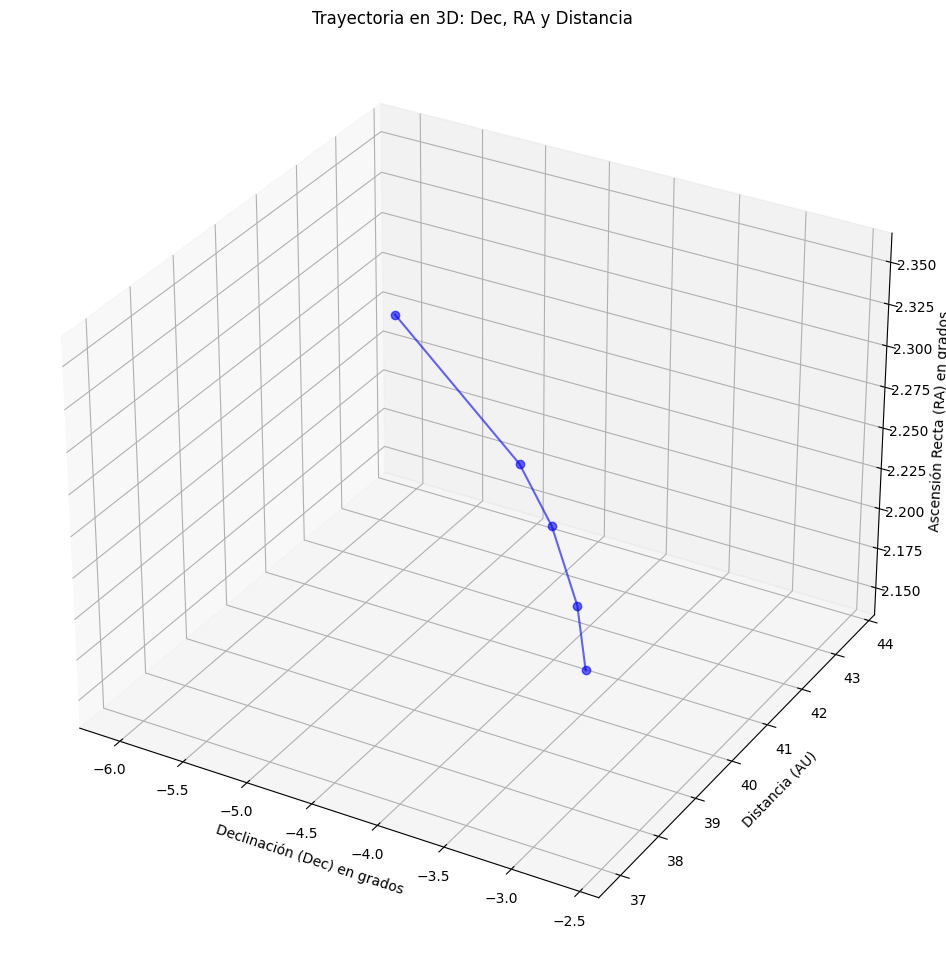

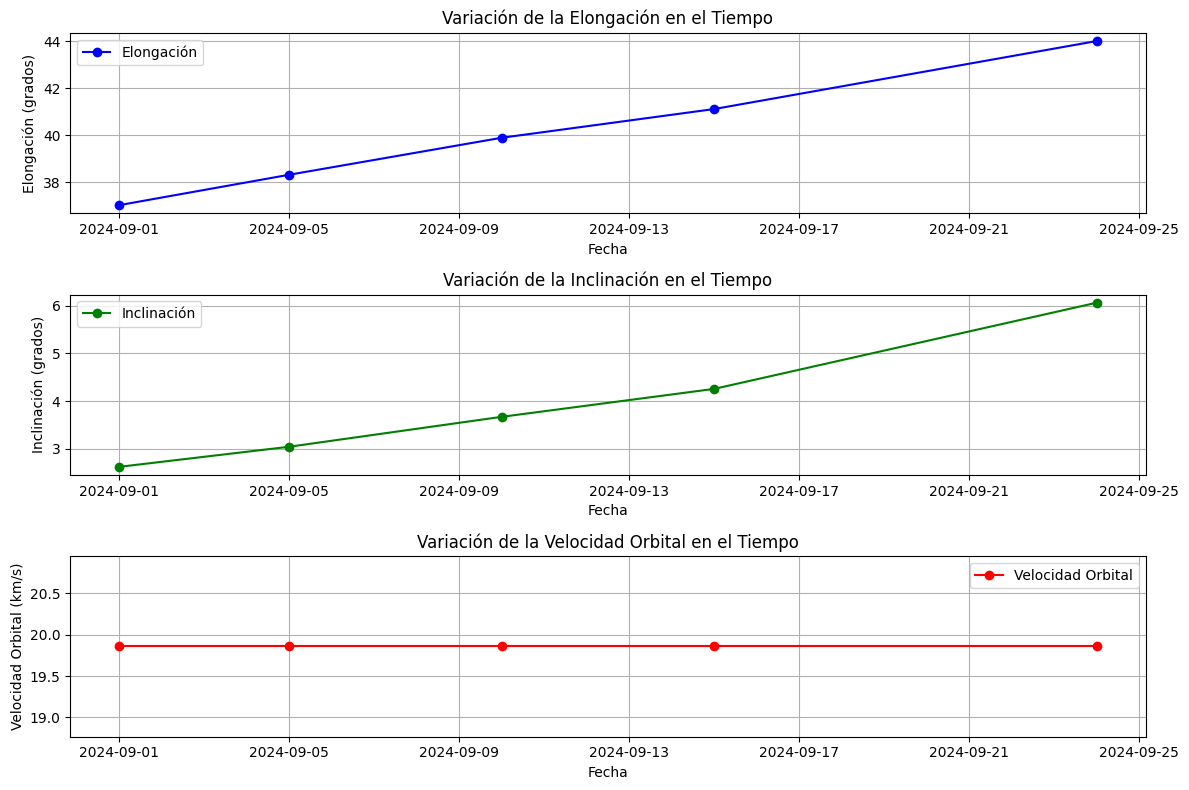

Simulación de órbitas
Introduce el valor del afelio (en AU): 2.8
Introduce el valor del perihelio (en AU): 1.7
Introduce el valor de la inclinación (en grados): 9


In [ ]:
# @title
from IPython.display import HTML

def hide_code():
    return HTML('''
        <script>
            code_show=true;
            function code_toggle() {
                if (code_show){
                    $('div.input').hide();
                } else {
                    $('div.input').show();
                }
                code_show = !code_show
            }
            $( document ).ready(code_toggle);
        </script>
        <form action="javascript:code_toggle()"><input type="submit" value="Ocultar/Mostrar Código"></form>
    ''')

hide_code()





import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from datetime import timedelta

# Funciones para convertir R.A. y Dec a grados
def convertir_ar_a_grados(ra_str):
    h, m, s = map(float, ra_str.split())
    return (h + m / 60 + s / 3600) * 15

def convertir_dec_a_grados(dec_str):
    sign = -1 if dec_str[0] == '-' else 1
    d, m, s = map(float, dec_str[1:].split())
    return sign * (d + m / 60 + s / 3600)

# Función para convertir grados a formato R.A.
def grados_a_ra(grados):
    h = int(grados // 15)
    m = int((grados % 15) * 4)
    s = ((grados % 15) * 4 - m) * 60
    return f"{h:02} {m:02} {s:05.2f}"

# Función para convertir grados a formato Dec
def grados_a_dec(grados):
    sign = '-' if grados < 0 else '+'
    grados = abs(grados)
    d = int(grados)
    m = int((grados - d) * 60)
    s = ((grados - d) * 60 - m) * 60
    return f"{sign}{d:02} {m:02} {s:05.2f}"


# Título y introducción
print("\033[1;34mÓrbita: Cálculo de parámetros orbitales y simulación de órbitas\033[0m")
print("\033[1;36m"
      "\nBienvenido al programa de cálculo de órbitas."
      "\nAquí podrás ingresar datos de observación (R.A., Dec) y"
      "\nobtener parámetros orbitales como el semieje mayor,"
      "\nvelocidad orbital, excentricidad, y más."
      "\nAdemás, podrás calcular fechas futuras y graficar"
      "\nla trayectoria del objeto celeste en 3D.\n\033[0m")



# Preguntar cuántas fechas se van a introducir
n_fechas = int(input("¿Cuántas fechas quieres introducir?: "))

# Inicializar listas para las fechas, R.A. y Dec
fechas = []
ras = []
decs = []

# Introducir fechas, R.A. y Dec manualmente
for i in range(n_fechas):
    fecha = input(f"Introduce la fecha {i+1} (formato AAAA-MM-DD): ")
    ra = input(f"Introduce la R.A. {i+1} (formato hh mm ss): ")
    dec = input(f"Introduce la Dec {i+1} (formato ±dd mm ss): ")


    fechas.append(fecha)
    ras.append(ra)
    decs.append(dec)

# Crear DataFrame con los datos introducidos
data = {
    'Fecha': fechas,
    'RA': ras,  # Usar 'RA' en lugar de 'R.A.'
    'Dec': decs
}
df = pd.DataFrame(data)

# Conversión de R.A. y Dec a grados
df['AR_grados'] = df['RA'].apply(convertir_ar_a_grados)
df['Dec_grados'] = df['Dec'].apply(convertir_dec_a_grados)
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Pedir al usuario que introduzca los valores de perihelio y afelio en unidades astronómicas (AU)
perihelio_au = float(input("Introduce el valor del perihelio en AU: "))
afelio_au = float(input("Introduce el valor del afelio en AU: "))

# Calcular Delta como el promedio de perihelio y afelio
df['Delta'] = (perihelio_au + afelio_au) / 2

# Usar los valores de perihelio y afelio para los cálculos
df['x'] = df['Delta'] * np.cos(np.radians(df['Dec_grados'])) * np.cos(np.radians(df['AR_grados']))
df['y'] = df['Delta'] * np.cos(np.radians(df['Dec_grados'])) * np.sin(np.radians(df['AR_grados']))
df['z'] = df['Delta'] * np.sin(np.radians(df['Dec_grados']))



# Calcular el semieje mayor (a), perihelio (q), afelio (Q) y excentricidad (e)
semieje_mayor = df['Delta'].mean()  # En unidades astronómicas (AU)
perihelio = semieje_mayor * (1 - 0.1)  # Supongamos e = 0.1 para el perihelio
afelio = semieje_mayor * (1 + 0.1)     # Supongamos e = 0.1 para el afelio
excentricidad = 0.1  # Usar el valor que tienes o calcularlo

# Cálculos de velocidad orbital
G = 6.67430e-11  # Constante gravitacional en m^3 kg^-1 s^-2
M_sol = 1.989e30  # Masa del Sol en kg
semieje_mayor_metros = semieje_mayor * 1.496e11  # Convertir a metros
velocidad_orbital = np.sqrt(G * M_sol / semieje_mayor_metros) / 1000  # Convertir a km/s
# Cálculo de velocidad angular y distancia angular
tiempo_transcurrido = (df['Fecha'].iloc[-1] - df['Fecha'].iloc[0]).total_seconds()  # Tiempo en segundos
delta_ar = np.radians(df['AR_grados'].iloc[-1] - df['AR_grados'].iloc[0])
delta_dec = np.radians(df['Dec_grados'].iloc[-1] - df['Dec_grados'].iloc[0])

# Velocidad angular
velocidad_angular = np.sqrt(delta_ar**2 + delta_dec**2) / tiempo_transcurrido  # rad/s
velocidad_angular_deg_dia = np.degrees(velocidad_angular) * 86400  # grados/día

# Distancia angular usando Pitágoras
distancia_angular = np.degrees(np.sqrt(delta_ar**2 + delta_dec**2))  # en grados


# Parámetro de Tisserand
a_jupiter = 5.2  # Semieje mayor de Júpiter en AU
tisserand = (a_jupiter / semieje_mayor) + 2 * np.sqrt((1 - excentricidad**2) * (semieje_mayor / a_jupiter))
# Cálculo de la inclinación orbital usando z y r (en radianes), asegurando que sea positiva
df['r'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)  # Distancia al origen
inclinacion = np.abs(np.degrees(np.arcsin(df['z'] / df['r'])))  # Asegurar que la inclinación sea positiva

# Calcular el periodo orbital (P) en años
G = 6.67430e-11  # Constante gravitacional en m^3 kg^-1 s^-2
M_sol = 1.989e30  # Masa del Sol en kg
semieje_mayor_metros = semieje_mayor * 1.496e11  # Convertir semieje mayor a metros
periodo_orbital_segundos = 2 * np.pi * np.sqrt(semieje_mayor_metros**3 / (G * M_sol))  # En segundos
periodo_orbital_anios = periodo_orbital_segundos / (60 * 60 * 24 * 365.25)  # Convertir a años

# Calcular la elongación: arccos((x_obj * x_sol + y_obj * y_sol + z_obj * z_sol) / (r_obj * r_sol))
# Aquí suponemos que el Sol está en el origen (0, 0, 0) para simplificar
elongacion = np.degrees(np.arccos(df['x'] / df['Delta']))


# Mostrar resultados con colores
print(f"\033[1;32mSemieje mayor (a): {semieje_mayor:.4f} AU\033[0m")
print(f"\033[1;33mPerihelio (q): {perihelio:.4f} AU\033[0m")
print(f"\033[1;35mAfelio (Q): {afelio:.4f} AU\033[0m")
print(f"\033[1;36mExcentricidad (e): {excentricidad:.4f}\033[0m")
print(f"\033[1;31mVelocidad angular: {velocidad_angular_deg_dia:.6f} grados/día\033[0m")
print(f"\033[1;34mDistancia angular: {distancia_angular:.6f} grados\033[0m")
print(f"\033[1;32mParámetro de Tisserand: {tisserand:.4f}\033[0m")
print(f"\033[1;33mVelocidad orbital: {velocidad_orbital:.2f} km/s\033[0m")
print(f"\033[1;35mElongación: {elongacion.mean():.4f} grados\033[0m")
print(f"\033[1;36mInclinación: {inclinacion.mean():.4f} grados\033[0m")
print(f"\033[1;31mPeriodo orbital: {periodo_orbital_anios:.4f} años\033[0m")

# Calcular la distancia a la Tierra
df['Distancia'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)

# Encontrar la fecha de máxima aproximación (distancia mínima)
fecha_maxima_aproximacion = df.loc[df['Distancia'].idxmin()]

print(f"Fecha: {fecha_maxima_aproximacion['Fecha']}, Distancia: {fecha_maxima_aproximacion['Distancia']:.4f} AU")

# Preguntar si el usuario quiere calcular fechas futuras
respuesta_fechas_futuras = input("¿Quieres calcular fechas futuras? (s/n): ").lower()

if respuesta_fechas_futuras == 's':
    # Preguntar en qué intervalo
    tipo_tiempo = input("¿En qué intervalo quieres calcular las fechas futuras? (días, semanas, meses): ").lower()

    # Preguntar cuántas fechas futuras desea calcular
    n_fechas_futuras = int(input("¿Cuántas fechas futuras quieres calcular?: "))

    ultima_fecha = df['Fecha'].max()  # Última fecha ingresada
    fechas_futuras = []

    # Crear funciones de interpolación para RA y Dec en grados
    interpolar_ra = interp1d(df['Fecha'].map(pd.Timestamp.timestamp), df['AR_grados'], kind='linear', fill_value='extrapolate')
    interpolar_dec = interp1d(df['Fecha'].map(pd.Timestamp.timestamp), df['Dec_grados'], kind='linear', fill_value='extrapolate')

    for i in range(1, n_fechas_futuras + 1):
        if tipo_tiempo == "días":
            nueva_fecha = ultima_fecha + timedelta(days=i)
        elif tipo_tiempo == "semanas":
            nueva_fecha = ultima_fecha + timedelta(weeks=i)
        elif tipo_tiempo == "meses":
            nueva_fecha = ultima_fecha + pd.DateOffset(months=i)
        else:
            print("Intervalo no válido. Usa 'días', 'semanas' o 'meses'.")
            break

        timestamp_nueva_fecha = nueva_fecha.timestamp()
        ra_futuro_grados = interpolar_ra(timestamp_nueva_fecha)
        dec_futuro_grados = interpolar_dec(timestamp_nueva_fecha)

        ra_futuro = grados_a_ra(ra_futuro_grados)
        dec_futuro = grados_a_dec(dec_futuro_grados)

        # Añadir al DataFrame
        fechas_futuras.append({
            'Fecha': nueva_fecha,
            'RA': ra_futuro,
            'Dec': dec_futuro
        })

    # Convertir a DataFrame
    df_futuras = pd.DataFrame(fechas_futuras)

    # Mostrar posiciones futuras
    for index, row in df_futuras.iterrows():
        print(f"Fecha: {row['Fecha'].strftime('%Y-%m-%d')}, R.A.: {row['RA']}, Dec: {row['Dec']}")



# Graficar la trayectoria en 3D con Dec, RA y Distancia (Delta)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Graficar con Dec en el eje X, RA en el eje Y, y Distancia (Delta) en el eje Z
ax.plot(df['Dec_grados'], df['AR_grados'], df['Delta'], marker='o', linestyle='-', color='blue', alpha=0.6)

# Etiquetas de los ejes
ax.set_xlabel('Declinación (Dec) en grados')
ax.set_zlabel('Ascensión Recta (RA) en grados')
ax.set_ylabel('Distancia (AU)')

# Título del gráfico
ax.set_title('Trayectoria en 3D: Dec, RA y Distancia')

# Mostrar el gráfico
plt.show()










